# BST & AVL trees implementation, benchmarks and tests

In [222]:
%matplotlib inline
import math
import random
import matplotlib.pyplot as plt
import numpy as np
import time
import gc

## BST

In [223]:
import math


class Node:
    def __init__(self, val=0):
        self.val = val
        self.left = None
        self.right = None


class BST:
    def __init__(self) -> None:
        self.root = None

    def insert(self, val) -> None:
        if self.root is None:
            self.root = Node(val)
        else:
            self._insert(self.root, val)
        
    def _insert(self, node, val):
        if val > node.val:
            if node.right is None:
                node.right = Node(val)
            else:
                self._insert(node.right, val)
        elif val < node.val:
            if node.left is None:
                node.left = Node(val)
            else:
                self._insert(node.left, val)
        else:
            return # no duplicates
    

    def search_the_tree(self, node, val):
        if node is None:
            return None
        if node.val == val:
            return node
        if val > node.val:
            return self.search_the_tree(node.right, val)
        else:
            return self.search_the_tree(node.left, val)

    def remove_val(self, val):
        self.root = self.remove_val_from_tree(self.root, val)
    
    def remove_val_from_tree(self, node, val):
        if node is None:
            return None
        if val > node.val:
            node.right = self.remove_val_from_tree(node.right, val)
        elif val < node.val:
            node.left = self.remove_val_from_tree(node.left, val)
        else:
            if node.left is None:
                return node.right
            if node.right is None:
                return node.left
            min_node = self.find_min(node.right)
            node.val = min_node.val
            node.right = self.remove_val_from_tree(node.right, min_node.val)
        return node

    def find_min(self, node):
        while node.left is not None:
            node = node.left
        return node

# AVL implementation

In [224]:
class AVLNode():
    def __init__(self, val=0):
        self.val = val
        self.left = None
        self.right = None
        self.height = 1


class AVL(BST):
    def __init__(self):
        self.root = None

    def insert(self, value: int):
        self.root = self._insert_node(self.root, value)

    def search_the_tree(self, number):
        current = self.root
        if current is None:
            return None
        while True:
            if number < current.val:
                if current.left is not None:
                    current = current.left
                else:
                    return None
            elif number > current.val:
                if current.right is not None:
                    current = current.right
                else:
                    return None
            else:
                return current

    def delete(self, value: int):
        self._delete_node(self.root, value)

    def _insert_node(self, node: AVLNode, value: int) -> AVLNode:

        # Find the correct location and insert the node
        if not node:
            return AVLNode(value)
        elif value < node.val:
            node.left = self._insert_node(node.left, value)
        else:
            node.right = self._insert_node(node.right, value)

        node.height = self.compute_height(node)

        # Update the balance factor and balance the tree
        balanceFactor = self.get_balance(node)
        if balanceFactor > 1:
            if value < node.left.val:
                return self.rightRotate(node)
            else:
                node.left = self.leftRotate(node.left)
                return self.rightRotate(node)

        if balanceFactor < -1:
            if value > node.right.val:
                return self.leftRotate(node)
            else:
                node.right = self.rightRotate(node.right)
                return self.leftRotate(node)

        return node

    def _delete_node(self, node: AVLNode, value: int) -> AVLNode:

        # Find the node to be deleted and remove it
        if not node:
            return node
        elif value < node.val:
            node.left = self._delete_node(node.left, value)
        elif value > node.val:
            node.right = self._delete_node(node.right, value)
        else:
            if node.left is None:
                temp = node.right
                node = None
                return temp
            elif node.right is None:
                temp = node.left
                node = None
                return temp
            temp = self.get_min_value_node(node.right)
            node.val = temp.val
            node.right = self._delete_node(node.right,
                                           temp.val)
        if node is None:
            return node

        # Update the balance factor of nodes
        node.height = self.compute_height(node)

        balanceFactor = self.get_balance(node)

        # Balance the tree
        if balanceFactor > 1:
            if self.get_balance(node.left) >= 0:
                return self.rightRotate(node)
            else:
                node.left = self.leftRotate(node.left)
                return self.rightRotate(node)
        if balanceFactor < -1:
            if self.get_balance(node.right) <= 0:
                return self.leftRotate(node)
            else:
                node.right = self.rightRotate(node.right)
                return self.leftRotate(node)
        return node

    def leftRotate(self, z: AVLNode) -> AVLNode:
        y = z.right
        T2 = y.left
        y.left = z
        z.right = T2
        z.height = self.compute_height(z)
        y.height = self.compute_height(y)

        return y

    def rightRotate(self, z: AVLNode) -> AVLNode:
        y = z.left
        T3 = y.right
        y.right = z
        z.left = T3
        z.height = self.compute_height(z)
        y.height = self.compute_height(y)
        return y

    def compute_height(self, node: AVLNode) -> int:
        return 1 + max(self.get_height(node.left),
                       self.get_height(node.right))

    def get_height(self, node: AVLNode) -> int:
        if not node:
            return 0
        return node.height

    def get_balance(self, node: AVLNode) -> int:
        if not node:
            return 0
        return self.get_height(node.left) - self.get_height(node.right)

    def get_min_value_node(self, node: AVLNode) -> int:
        if node is None or node.left is None:
            return node
        return self.get_min_value_node(node.left)

#   Tests

In [225]:
def test_tree():
    def test_if_tree_correct(root: Node):
        if not root:
            return True
        if not root.left and not root.right:
            return True
        if root.left and root.right:
            if not (root.left.val < root.val < root.right.val):
                return False
            else:
                return test_if_tree_correct(root.left) and test_if_tree_correct(root.right)
        elif root.left:
            if not (root.left.val < root.val):
                return False
            else:
                return test_if_tree_correct(root.left)
        if root.right:
            if not (root.val < root.right.val):
                return False
            else:
                return test_if_tree_correct(root.right)

        return True 

    test = random.sample(range(100000), 4000)
    tree = BST()

    for number in test:
        tree.insert(number)
        assert test_if_tree_correct(tree.root) is True

    for number in test:
        tree.remove_val(number)  
        assert test_if_tree_correct(tree.root) is True


def test_avl_tree():
    def test_if_tree_correct(tree: AVL, root: AVLNode):
        if not root:
            return True
        if not root.left and not root.right:
            return True
        if root.left and root.right:
            if not (root.left.val < root.val < root.right.val) or not (-2 < tree.get_balance(root) < 2):
                return False
            else:
                return test_if_tree_correct(tree, root.left) and test_if_tree_correct(tree, root.right)
        elif root.left:
            if not (root.left.val < root.val):
                return False
            else:
                return test_if_tree_correct(tree, root.left)
        if root.right:
            if not (root.val < root.right.val):
                return False
            else:
                return test_if_tree_correct(tree, root.right)


    test = random.sample(range(100000), 4000)
    tree = AVL()

    for number in test:
        tree.insert(number)
        assert test_if_tree_correct(tree, tree.root) is True

    for number in test:
        tree._delete_node(tree.root, number)
        assert test_if_tree_correct(tree, tree.root) is True

test_tree()
test_avl_tree()

#   Benchmarks

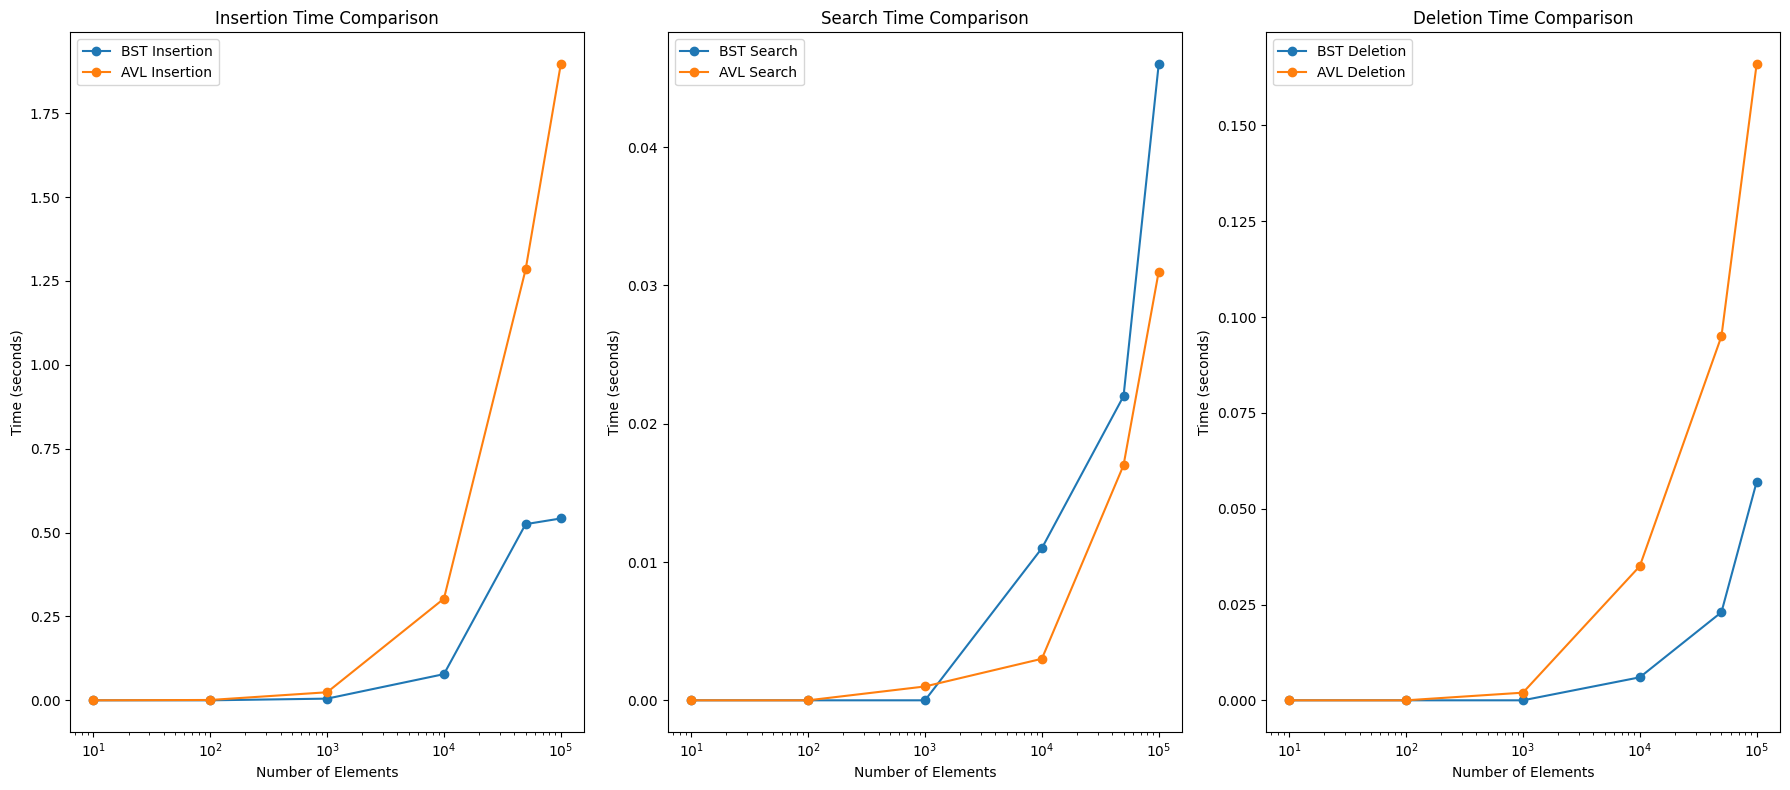

In [230]:
import time
import gc
import matplotlib.pyplot as plt
import random

# Disable garbage collection for consistent timing measurements
gc.disable()

# Sample data
sample = random.sample(range(1000000), 100000)
probes = [10, 100, 1000, 10000, 50000, 100000]

insert_case_bst = []  # Times for inserting into BST
insert_case_avl = []  # Times for inserting into AVL
search_case_bst = []  # Times for searching in BST
search_case_avl = []  # Times for searching in AVL
delete_case_bst = []  # Times for deleting from BST
delete_case_avl = []  # Times for deleting from AVL

for probe in probes:
    # ---- Insertion Benchmark ----
    # Measure time for inserting into BST
    bst = BST()
    start_time = time.time()
    for number in sample[:probe]:
        bst.insert(number)
    end_time = time.time()
    insert_case_bst.append(end_time - start_time)

    # Measure time for inserting into AVL
    avl = AVL()
    start_time = time.time()
    for number in sample[:probe]:
        avl.insert(number)
    end_time = time.time()
    insert_case_avl.append(end_time - start_time)

    # ---- Searching Benchmark ----
    search_elements = random.sample(sample[:probe], probe // 10)  # Select a subset of elements to search

    # Time for searching in BST
    start_time = time.time()
    for number in search_elements:
        bst.search_the_tree(bst.root, number)
    end_time = time.time()
    search_case_bst.append(end_time - start_time)

    # Time for searching in AVL
    start_time = time.time()
    for number in search_elements:
        avl.search_the_tree(number)
    end_time = time.time()
    search_case_avl.append(end_time - start_time)

    # ---- Deletion Benchmark ----
    delete_elements = random.sample(sample[:probe], probe // 10)  # Select a subset of elements to delete

    # Time for deleting from BST
    start_time = time.time()
    for number in delete_elements:
        bst.remove_val(number)
    end_time = time.time()
    delete_case_bst.append(end_time - start_time)

    # Time for deleting from AVL
    start_time = time.time()
    for number in delete_elements:
        avl.delete(number)
    end_time = time.time()
    delete_case_avl.append(end_time - start_time)

# Re-enable garbage collection
gc.enable()

# ---- Plotting the Results ----
plt.figure(figsize=(18, 8))

plt.subplot(1, 3, 1)
plt.plot(probes, insert_case_bst, label='BST Insertion', marker='o')
plt.plot(probes, insert_case_avl, label='AVL Insertion', marker='o')
plt.legend()
plt.title('Insertion Time Comparison')
plt.xlabel('Number of Elements')
plt.ylabel('Time (seconds)')
plt.xscale('log')

plt.subplot(1, 3, 2)
plt.plot(probes, search_case_bst, label='BST Search', marker='o')
plt.plot(probes, search_case_avl, label='AVL Search', marker='o')
plt.legend()
plt.title('Search Time Comparison')
plt.xlabel('Number of Elements')
plt.ylabel('Time (seconds)')
plt.xscale('log')

plt.subplot(1, 3, 3)
plt.plot(probes, delete_case_bst, label='BST Deletion', marker='o')
plt.plot(probes, delete_case_avl, label='AVL Deletion', marker='o')
plt.legend()
plt.title('Deletion Time Comparison')
plt.xlabel('Number of Elements')
plt.ylabel('Time (seconds)')
plt.xscale('log')

plt.tight_layout()
plt.show()
